# mnistで多クラス分類

In [27]:
# ライブラリインストール
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn import datasets
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# データロード
dataset = datasets.load_digits()

In [6]:
# 前処理
target = torch.tensor(dataset['target'])
target = F.one_hot(target, num_classes = 10)
scaler = StandardScaler()
images = torch.tensor(scaler.fit_transform(dataset['images'].reshape(-1, 64)), dtype = torch.float32)

In [4]:
# パラメータ初期化
W = torch.rand((10, 64), requires_grad = True)
b = torch.rand((1, 10), requires_grad = True)

In [9]:
x = torch.tensor([[1, 3, 6],
                  [2, 4, 8]])
e_x = torch.exp(x - torch.max(x, dim = 1, keepdim = True)[0])
e_x

tensor([[0.0067, 0.0498, 1.0000],
        [0.0025, 0.0183, 1.0000]])

In [12]:
torch.max(x, dim = 1, keepdim = True)

torch.return_types.max(
values=tensor([[6],
        [8]]),
indices=tensor([[2],
        [2]]))

In [35]:
torch.sum(e_x, dim = 1, keepdim = True)

tensor([[1.0565],
        [1.0208]])

In [49]:
y_pred = e_x / torch.sum(e_x, dim = 1, keepdim = True)
y_true = torch.tensor([[0, 0, 1],
                      [0, 1, 0]])
- torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_pred.shape[0]

tensor(2.0378)

In [52]:
# softmax関数
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim = 1, keepdim = True)[0])
    y_pred = e_x / (torch.sum(e_x, dim = 1, keepdim = True) + 1e-10)
    return y_pred

In [53]:
# 損失関数定義
def cross_entropy(y_true, y_pred):
    loss = - torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_pred.shape[0]
    return loss

In [14]:
images[0].reshape(-1, 64).shape

torch.Size([1, 64])

In [15]:
target[0].reshape(-1, 10).shape

torch.Size([1, 10])

In [19]:
target[0].shape

torch.Size([10])

In [54]:
loss_log = []
learning_rate = 0.03

for epoch in range(5):
    running_loss = 0
    for i in range(len(images)):
        # 多項ロジスティック回帰計算
        X = images[i].reshape(-1, 64)
        z = X @ W.T + b
        # softmax
        y_pred = softmax(z)
        # cross entropy
        loss = cross_entropy(target[i].reshape(-1, 10), y_pred)
        loss_log.append(loss)
        # 1エポック分の損失を加算してる
        running_loss += loss.item()

        #勾配計算
        loss.backward()
        # パラメータ更新
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad
        # 勾配初期化
        W.grad.zero_()
        b.grad.zero_()
    # 損失ログ出力
    print(f'epoch : {epoch + 1} : {running_loss / len(target)}') # この割り算は1エポック合計の損失をデータ数で割ってる → 損失の平均

epoch : 1 : 0.4095512822945395
epoch : 2 : 0.1532479661685408
epoch : 3 : 0.11708136296499787
epoch : 4 : 0.08782764171458174
epoch : 5 : 0.07730825345970813


In [28]:
loss_log[0].item()

-0.0

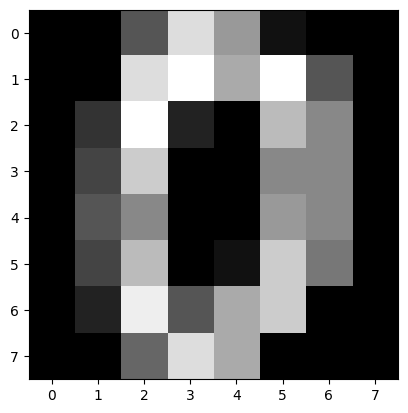

In [25]:
plt.imshow(dataset['images'][0], cmap = 'gray')

In [44]:
scaled_images.shape

torch.Size([1797, 64])

In [45]:
w.T.shape

torch.Size([64, 10])

### 答え

In [94]:
# 1.データロード
dataset = datasets.load_digits()
images = dataset['images']
target = dataset['target']

In [95]:
# 2.前処理
y_true = F.one_hot(torch.tensor(target), num_classes = 10)
images = torch.tensor(images, dtype = torch.float32).reshape(-1, 64) # np.arrayはfloat６４がデフォルト

images = (images - images.mean()) / images.std()

In [96]:
learn_rate = 0.03
loss_log = []

In [97]:
images.shape

torch.Size([1797, 64])

In [98]:
# 3.パラメータの初期化
W = torch.rand((10, 64), requires_grad = True)
b = torch.rand((1, 10), requires_grad = True)

In [99]:
# 4.softmax
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim = -1, keepdim = True)[0]) # e_xのshapeは(1797, 10)
    y_pred = e_x / (torch.sum(e_x, dim = -1, keepdim = True) + 1e-10)
    return y_pred

In [100]:
# 5.cross entropy
def cross_entropy(y_true, y_pred):
    l = - torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_true.shape[0]
    return l

In [101]:
for epoch in range(5):
    running_loss = 0
    for i in range(len(target)):
        # 6.入力データxおよび教師ラベルのyを作成
        y_true_ = y_true[i].reshape(-1, 10) # データ数✖️クラス数
        X = images[i].reshape(-1, 64) # データ数✖️特徴量数

        # 7. z計算
        z = X@W.T + b

        # 8. softmaxで予測計算
        y_pred = softmax(z)

        # 9.損失計算
        loss = cross_entropy(y_true, y_pred)
        loss_log.append(loss.item())
        running_loss += loss.item()

        # 10.勾配計算
        loss.backward()

        # 11.パラメータ更新
        with torch.no_grad():
            W -= learn_rate * W.grad
            b -= learn_rate * b .grad

        # 12.勾配初期化
        W.grad.zero_()
        b.grad.zero_()

        # 13.損失ログ出力
    print(f'epoch : {epoch + 1} : {running_loss / len(target)}')

epoch : 1 : 2.4602985846445704
epoch : 2 : 2.3239446291342403
epoch : 3 : 2.3116859926670608
epoch : 4 : 2.3076557160485236
epoch : 5 : 2.305820981595141


## 多項ロジスティック回帰をミニバッチ学習

In [17]:
np.random.permutation(list(range(len(target))))[:30]

array([1722,  679,  143, 1609, 1382,  669,  482, 1027, 1247,  322,   40,
        261, 1665, 1324,  347,  808,   14, 1793, 1238,  540,  823, 1070,
       1179,  155,  682,  497,  580,  242,  238, 1762])

In [8]:
target.shape

torch.Size([1797, 10])

In [9]:
images.shape

torch.Size([1797, 64])

In [18]:
# パラメータの初期化
W = torch.rand((10, 64), requires_grad = True)
b = torch.rand((1, 10), requires_grad = True)

In [19]:
# softmax
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim = 1, keepdim = True)[0])
    y_pred = e_x / (torch.sum(e_x, dim = 1, keepdim = True) + 1e-10)
    return y_pred

In [20]:
def loss(y_true, y_pred):
    l = - torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_true.shape[0]
    return l

In [21]:
images[0:30].shape

torch.Size([30, 64])

In [22]:
learning_rate = 0.03
loss_log = []
batch_size = 30
num_batches = np.ceil(len(target) / batch_size).astype(int)

In [24]:
for epoch in range(5):
    running_loss = 0
    s = 0
    index_list = np.random.permutation(list(range(len(target))))
    for i in range(batch_size, len(target), batch_size):
        bach_indices = index_list[s:i]
        x = images[bach_indices, :]
        # 線形演算
        z = x @ W.T + b
        # 確率値に変換
        p = softmax(z)
        # 損失計算
        l = loss(target[bach_indices, :], p)
        loss_log.append(l)
        running_loss += l
        # 勾配計算
        l.backward()
        # 勾配更新
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad
        # 勾配初期化委
        W.grad.zero_()
        b.grad.zero_()
        
        s = i
    # 損失ログ出力
    print(f"epoch{epoch + 1} : {running_loss / num_batches}")

epoch1 : 0.37440305948257446
epoch2 : 0.33568188548088074
epoch3 : 0.30358436703681946
epoch4 : 0.28025612235069275
epoch5 : 0.261054664850235


In [25]:
images[index_list[s:i]]

tensor([], size=(0, 64))

In [26]:
images[index_list[0:30], :]

tensor([[ 0.0000, -0.3350, -0.6742,  ...,  1.3962,  0.7170, -0.1960],
        [ 0.0000, -0.3350,  0.7984,  ..., -1.1466, -0.5057, -0.1960],
        [ 0.0000, -0.3350, -0.8846,  ..., -0.4686, -0.5057, -0.1960],
        ...,
        [ 0.0000, -0.3350, -1.0949,  ..., -0.4686, -0.5057, -0.1960],
        [ 0.0000, -0.3350,  1.2191,  ...,  1.5657,  3.4069,  2.4927],
        [ 0.0000, -0.3350, -0.8846,  ..., -1.1466, -0.5057, -0.1960]])

In [50]:
batch_size = 30
num_batches = np.ceil(len(target) / batch_size).astype(int)
num_batches

60

## 学習データと検証データに分ける

In [68]:
# 4. softmaxとcross entropy
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim=-1, keepdim=True)[0])
    return e_x / (torch.sum(e_x, dim=-1, keepdim=True) + 1e-10)

def cross_entropy(y_true, y_pred):
    return -torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_true.shape[0]

In [81]:
# データロード
dataset = datasets.load_digits()
# 前処理
target = torch.tensor(dataset['target'])
target = F.one_hot(target, num_classes = 10)
images = torch.tensor(dataset['images']).reshape(-1, 64)
X_train, X_val, y_train, y_val = train_test_split(images, target, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train), dtype = torch.float32)
X_val = torch.tensor(scaler.transform(X_test), dtype = torch.float32)

# パラメータ初期化
W = torch.rand((10, 64), requires_grad = True)
b = torch.rand((1, 10), requires_grad = True)

batch_size = 30
num_batches = np.ceil(len(y_train) / batch_size).astype(int)
loss_log = []
train_losses = []
val_losses = []
val_accuracies = []
epochs = 30
for epoch in range(epochs):
    running_loss = 0
    index_list_tr = np.random.permutation(list(range(len(X_train))))
    for i in range(num_batches):
        s = i * batch_size
        e = s + batch_size
        batch_indices = index_list_tr[s:e]
        z = X_train[batch_indices, :] @ W.T + b
        y_pred = softmax(z)
        loss = cross_entropy(y_train[batch_indices, :], y_pred)
        loss.backward()
        loss_log.append(loss)
        running_loss += loss.item()
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad
        W.grad.zero_()
        b.grad.zero_()

    # validation
    with torch.no_grad():
        z_val = X_val @ W.T + b
        y_pred_val = softmax(z_val)
        val_loss = cross_entropy(y_val, y_pred_val)
        val_accuracy = torch.sum(torch.argmax(y_pred_val, dim=-1) == torch.argmax(y_val, dim=-1)) / y_val.shape[0]

    train_losses.append(running_loss/num_batches)
    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracy.item())
    
    print(f"epoch{epoch + 1} : train loss:{running_loss / num_batches}, val loss: {val_loss.item()}, val_accuracy: {val_accuracy.item()}")

epoch1 : train loss:2.579382598400116, val loss: 20.477012634277344, val_accuracy: 0.10833333432674408
epoch2 : train loss:1.3546452261507511, val loss: 20.457937240600586, val_accuracy: 0.10833333432674408
epoch3 : train loss:0.9165204341212908, val loss: 20.438894271850586, val_accuracy: 0.10833333432674408
epoch4 : train loss:0.7016629955420891, val loss: 20.418304443359375, val_accuracy: 0.10833333432674408
epoch5 : train loss:0.5722138111790022, val loss: 20.392683029174805, val_accuracy: 0.10833333432674408
epoch6 : train loss:0.48284728545695543, val loss: 20.359560012817383, val_accuracy: 0.10833333432674408
epoch7 : train loss:0.4187846854329109, val loss: 20.309837341308594, val_accuracy: 0.10833333432674408
epoch8 : train loss:0.370621367978553, val loss: 20.25441551208496, val_accuracy: 0.10833333432674408
epoch9 : train loss:0.33438802510499954, val loss: 20.17575454711914, val_accuracy: 0.10833333432674408
epoch10 : train loss:0.30523018119856715, val loss: 20.09401512145

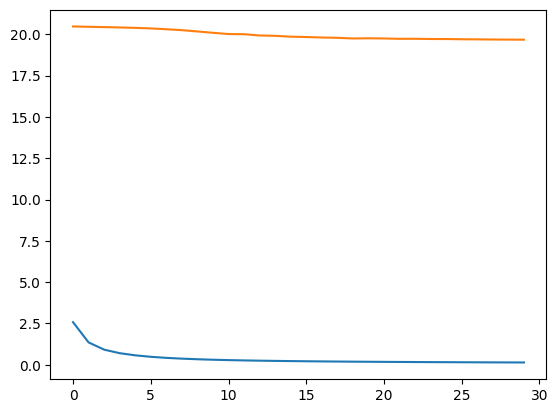

In [82]:
plt.plot(train_losses)
plt.plot(val_losses)